# Metody analizy skupień na przykładzie teorii przejścia demograficznego
### Jędrzej Adaszyński

Celem analizy jest próba wykorzystania metod analizy skupień (klasteryzacji) do analizy procesu przejścia demograficznego na świecie i w Europie.

Instalujemy paczkę wbgapi do pobierania danych przez api Banku Światowego

In [ ]:
!pip install wbgapi

In [ ]:
import wbgapi as wb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

Pobieramy listę krajów

In [ ]:
countries = wb.economy.DataFrame()

Definiujemy zmienne, które wykorzystamy do modelu

In [ ]:
cnames_demo = {
'SP.DYN.IMRT.IN' : 'Infant_Mortality',
'SP.POP.65UP.TO.ZS' : 'Population_over65',
'SP.POP.0014.TO.ZS' : 'Population_less14',
'SP.DYN.LE00.IN' : 'LifeExpectancy',
'SP.DYN.CBRT.IN' : 'BirthRate',
'SP.DYN.TFRT.IN' : 'FertilityRate',
'SP.POP.GROW' : 'PopulationGrowth',
'SP.DYN.CDRT.IN' : 'MortalityRate'
      }

collist_demo = [i for i in cnames_demo]
newnames_demo = list(cnames_demo.values())
cnames_demo_scaled = [i + "_scaled" for i in newnames_demo]

Pobieramy dane dla roku 2016 dla wszystkich krajów

In [ ]:
c = wb.data.DataFrame(collist_demo,countries.index, 2016)
c = c.rename(columns = cnames_demo)

In [ ]:
c.head()

,BirthRate,MortalityRate,Infant_Mortality,LifeExpectancy,FertilityRate,Population_less14,Population_over65,PopulationGrowth
economy,,,,,,,,
ABW,11.404000,8.765000,NaN,75.868000,1.872000,18.257495,12.604890,0.502860
AFE,34.820768,7.893734,47.577834,62.787681,4.569675,42.346779,3.074668,2.712218
AFG,33.981000,6.742000,51.300000,63.763000,4.800000,44.272113,2.519923,2.778035
AFW,38.069481,10.642471,66.904695,56.974761,5.251674,43.891295,2.773261,2.730332
AGO,41.882000,8.716000,55.600000,59.925000,5.686000,47.053352,2.261018,3.378269


Pobieramy plik csv z krajami, aby zmapować je do kontynentów

In [ ]:
cntrs = pd.read_csv("https://gist.githubusercontent.com/stevewithington/20a69c0b6d2ff846ea5d35e5fc47f26c/raw/13716ceb2f22b5643ce5e7039643c86a0e0c6da6/country-and-continent-codes-list-csv.csv")
c = c.merge(cntrs, left_index=True, right_on= 'Three_Letter_Country_Code', how = 'inner')

Definiujemy kolory dla kontynentów

In [ ]:
colors = {'Asia' : 'gold',
          'Africa' : 'orange',
          'North America' : 'green',
          'South America' : 'purple',
          'Europe' : 'blue',
          'Oceania' : 'red'}

### Wstępna analiza danych

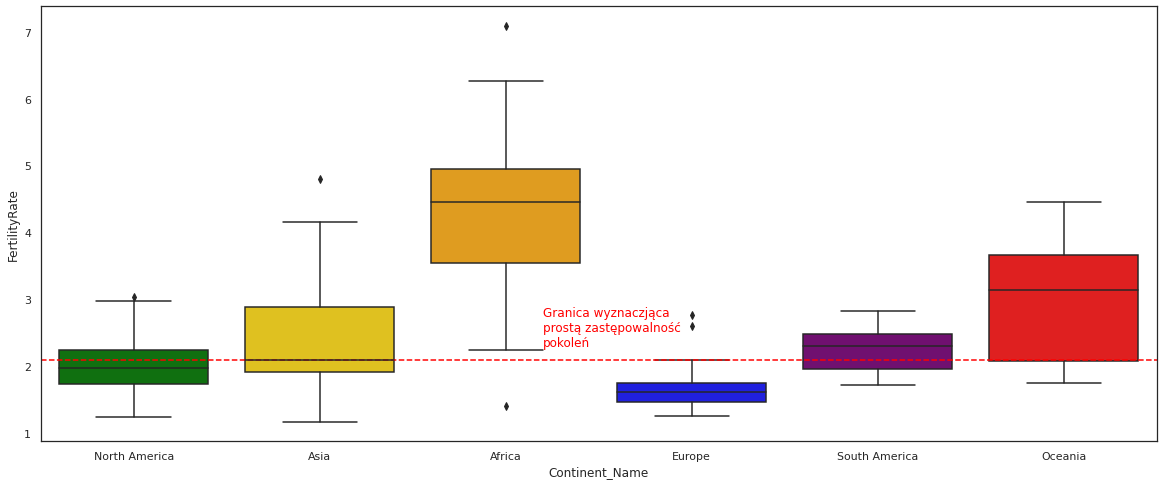

In [ ]:
%matplotlib inline

sns.set(rc={'figure.figsize':(20,8)})
sns.set_style("white")

ax = sns.boxplot(x = "Continent_Name", y = "FertilityRate", data = c, palette=colors)
ax.axhline(y = 2.1, ls = '--', color = 'red')
ax.text(2.2,  2.3, "Granica wyznaczjąca \nprostą zastępowalność \npokoleń", color = 'red')
sns.set_style("dark")

Punktem wyjścia do analizy przejścia demograficznego może być analiza współczynnika dzietności. Społeczeństwa  wraz z rozwojem demograficznym charakteryzują się niższą dzietnością. Progiem, który uznawany jest powszechnie za granicę współczynnika, przy której zachowana jest zastępowalność pokoleń jest wartość 2,1. Przy założeniu o braku migracji między krajami, współczynnik ten określa nam czy w długim okresie możemy spodziewać się przyrostu populacji kraju. 

Współczynnik ten, zgodnie z wykresem, jest w znaczny sposób zróżnicowany geograficznie. Kraje Europy w większości nie osiągają poziomu zastępowalności pokoleń – przykładami krajów powyżej tej granicy są kraje transkontynentalne – Kazachstan i Turcja. Medianę tego współczynnika w krajach Europy obserwujemy na poziomie około 1,5.

Zupełnie odwrotną sytuację obserwujemy w Afryce, jedynie jeden z obserwowanych krajów nie osiąga poziomu 2,1 – jest to Mauritius. Kraj o największej dzietności – Niger, osiąga poziom powyżej 7, co znaczy że przeciętna kobieta w wieku rozrodczym urodzi około siedem dzieci.


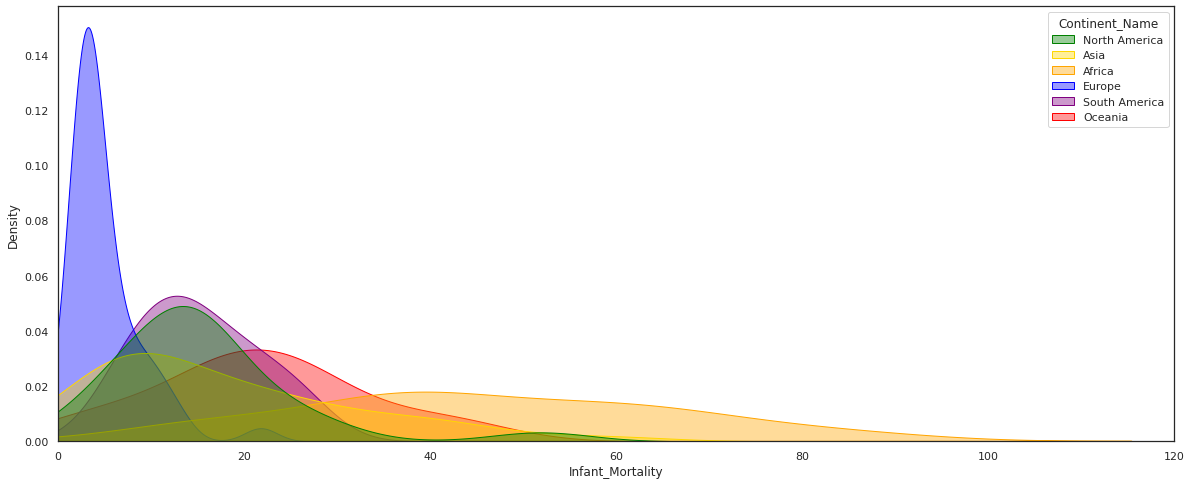

In [ ]:
sns.set_style("white")
sns.kdeplot(data=c, x="Infant_Mortality", hue="Continent_Name", fill=True, common_norm=False, alpha=0.4, palette = colors, gridsize = 1000)
plt.xlim(.0, 120)
plt.show()

Jedną ze zmiennych, która posłuży nam do zobrazowania śmiertelności w modelu, jest śmiertelność niemowląt. Zmienna dla krajów europejskich koncentruje się blisko zera. Uwagę zwracać może płaski rozkład zmiennej dla Afryki, co sugerować może bardzo duże zróżnicowanie pod kątem warunków życia i rozpowszechnienia dostępu do ochrony zdrowia. Rozkładem ze szczególnie widoczną niesymetrycznością jest rozkład tej zmiennej dla Azji – dla większości krajów wartość tego współczynnika jest poniżej średniej dla całego kontynentu.

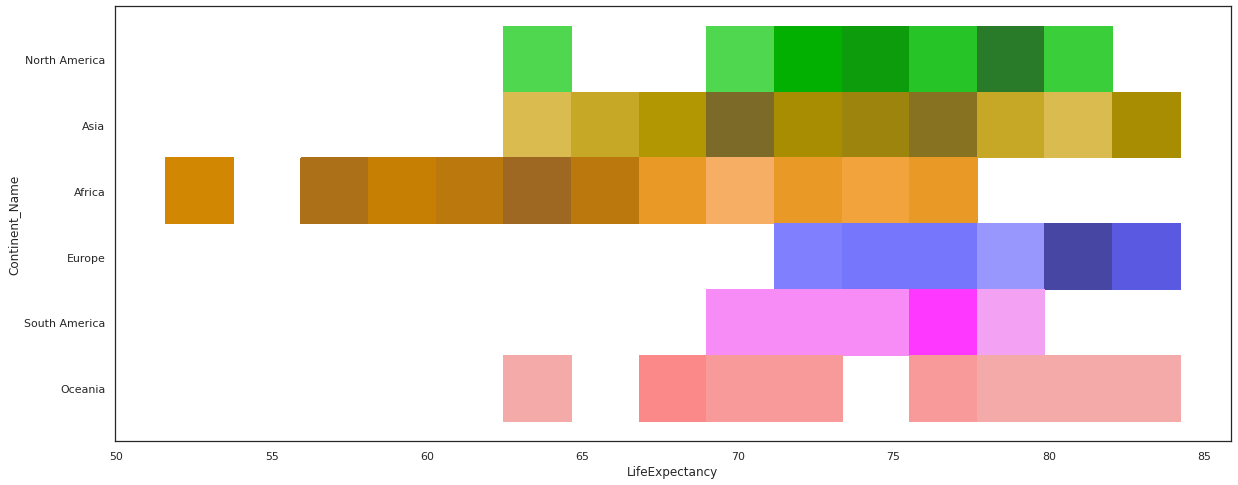

In [ ]:
sns.histplot(data=c, x="LifeExpectancy", hue="Continent_Name", y = "Continent_Name", palette = colors, bins = 15, legend = False)

W analizie teorii przejścia demograficznego ważnym elementem jest oczekiwana długość życia. Wraz z rozwojem społeczeństwa przeciętny wiek osiągany przez mieszkańców danego kraju rośnie. 

Histogram zwraca uwagę na Afrykę, w której oczekiwana długość życia koncentruje się w przedziale 60-65 lat, a występują kraje, w których ludność przeciętnie nie dożyje 55 roku. W Europie, Azji oraz Oceanii występują kraje ze szczególnie wysoką wartością tej zmiennej, sięgającej powyżej 82 lat.


In [ ]:
corr = c[newnames_demo].corr().round(2)
corr.style.background_gradient(cmap='coolwarm')

,Infant_Mortality,Population_over65,Population_less14,LifeExpectancy,BirthRate,FertilityRate,PopulationGrowth,MortalityRate
Infant_Mortality,1.000000,-0.670000,0.850000,-0.930000,0.870000,0.850000,0.530000,0.160000
Population_over65,-0.670000,1.000000,-0.810000,0.720000,-0.790000,-0.700000,-0.680000,0.480000
Population_less14,0.850000,-0.810000,1.000000,-0.860000,0.980000,0.950000,0.660000,-0.130000
LifeExpectancy,-0.930000,0.720000,-0.860000,1.000000,-0.870000,-0.840000,-0.470000,-0.240000
BirthRate,0.870000,-0.790000,0.980000,-0.870000,1.000000,0.980000,0.710000,-0.060000
FertilityRate,0.850000,-0.700000,0.950000,-0.840000,0.980000,1.000000,0.690000,0.010000
PopulationGrowth,0.530000,-0.680000,0.660000,-0.470000,0.710000,0.690000,1.000000,-0.410000
MortalityRate,0.160000,0.480000,-0.130000,-0.240000,-0.060000,0.010000,-0.410000,1.000000


Analiza macierzy korelacji pokazuje bardzo dużą współzależność zmiennych. Klika generalnych wniosków wynikających z tabeli:

•	Uwagę szczególnie zwraca bardzo wysoka korelacja współczynnika dzietności i liczby urodzeń na 1000 mieszkańców. Zmienne te opisują jeden proces, a więc liczbę urodzeń w danym roku, jednak odnoszą się do innych agregatów populacyjnych.

•	Relatywnie niską korelację cechują się zmienne odnoszące się do oczekiwanej długości życia oraz udziału osób powyżej 65 roku życia. Wykres współzależności pokazuje skąd ta zależność może wynikać – niektóre kraje europejskie mimo niskiej oczekiwanej długości życia, już są społeczeństwami starzejącymi się.

•	Korelacja wzrostu populacji ze zmiennymi dotyczącymi śmiertelności oraz dzietności występuje jednak nie jest duża; wynika to prawdopodobnie z procesów migracyjnych

•	Społeczeństwa starsze cechują się niższą dzietnością niż społeczeństwa młodsze; 

•	Wraz ze wzrostem oczekiwanej długości życia obserwujemy niższą śmiertelność niemowląt; obie zmienne bardzo mocno zależne są od powszechności dostępu do opieki zdrowotnej

•	Wskaźnik śmiertelności nie jest silnie skorelowany z innymi zmiennymi; wynikać to może ze struktury społeczeństwa oraz lokalnych wyżów i niżów demograficznych, a także czynników zewnętrznych


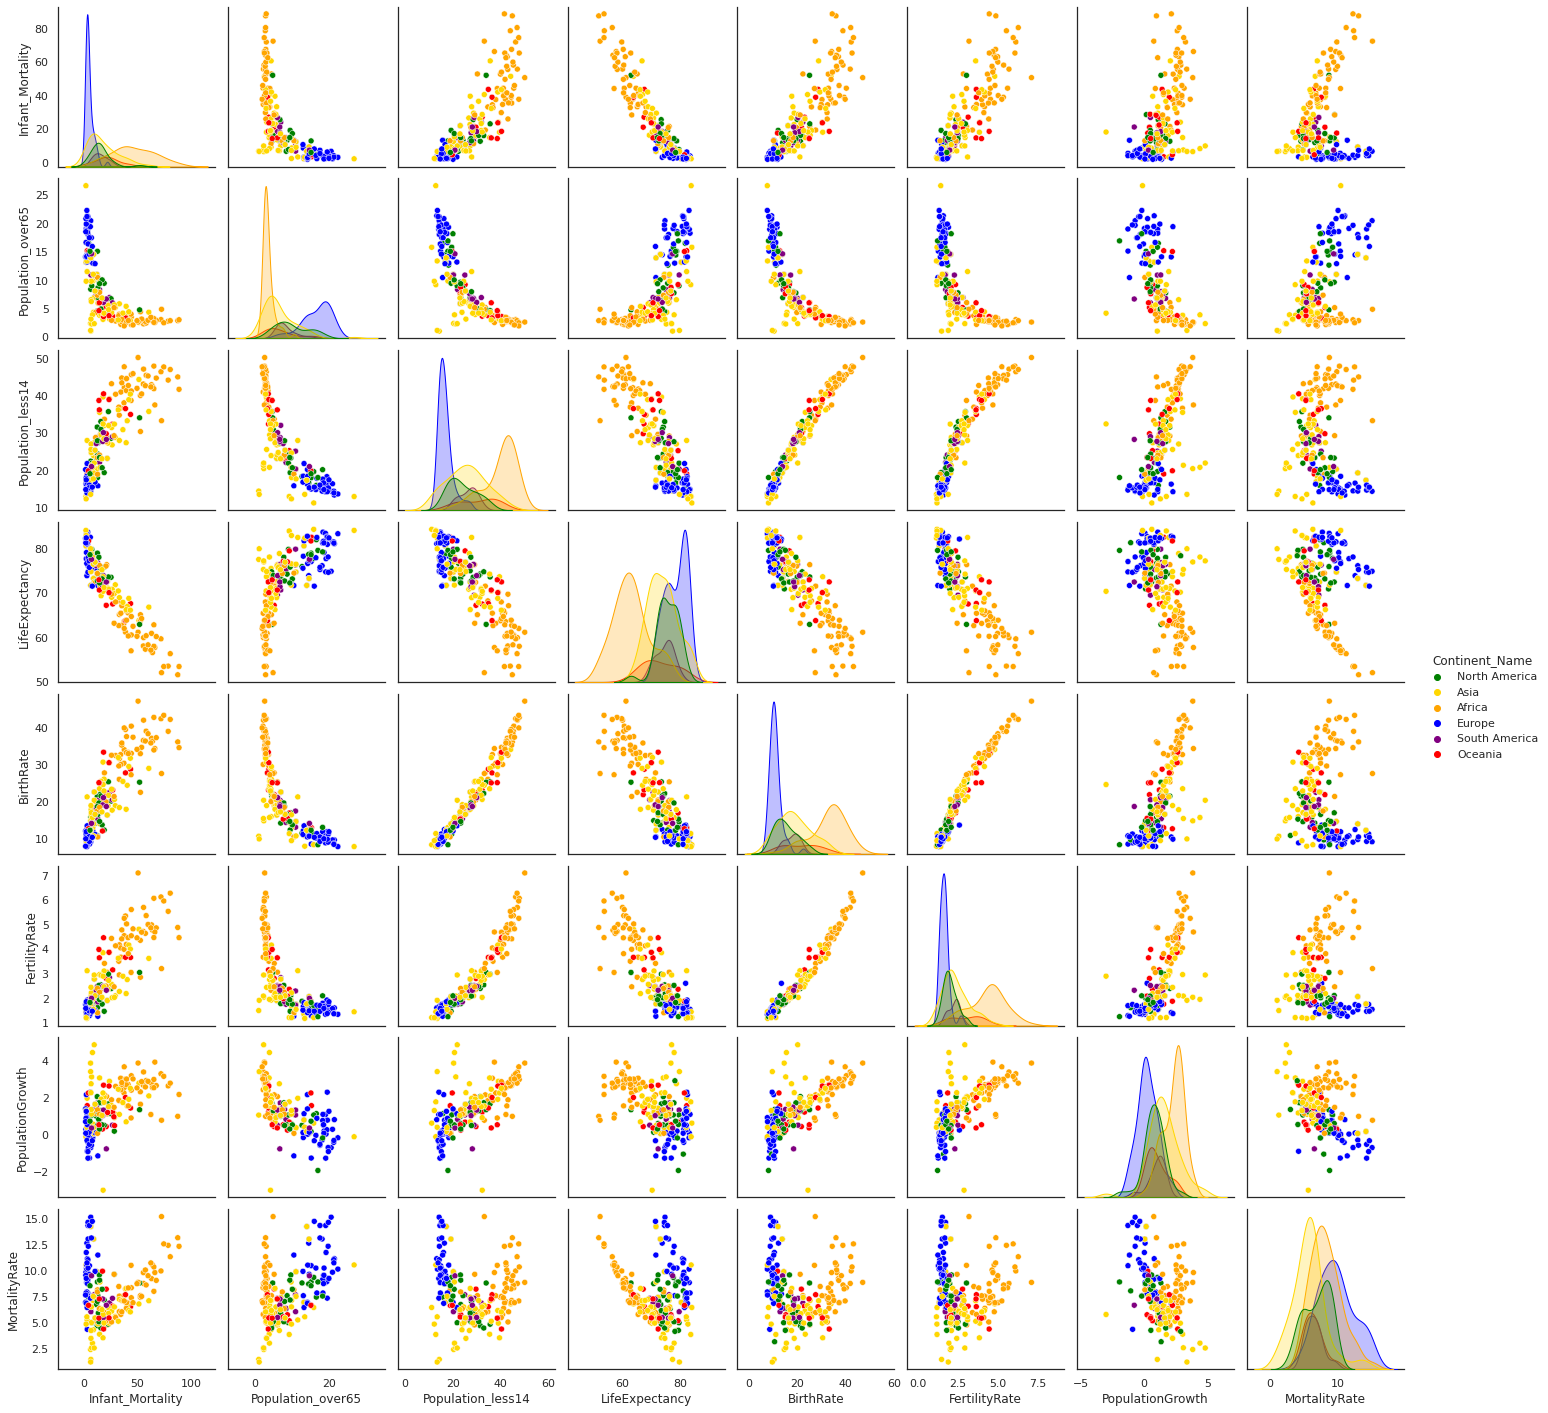

In [ ]:
sns.pairplot(c[['Infant_Mortality',
 'Population_over65',
 'Population_less14',
 'LifeExpectancy',
 'BirthRate',
 'FertilityRate',
 'PopulationGrowth',
 'Continent_Name',
 'MortalityRate']], hue = "Continent_Name", palette = colors)

*   Na większości wykresów widać wyraźną zależność geograficzną; Afryka i Europa są kontynentami na różnych końcach wykresów
*   Wykres wskaźnika śmiertelności pokazuje, że Europa i Afryka cechują się śmiertelnością na podobnie wysokim poziomie; w przypadku Afryki wynikać to może z rozwoju krajów, a w przypadku Europy ze dużego udziału osób starszych
*   Wykresy związane z wzrostem populacji są mało skorelowane są innymi zmiennymi, co może wynikać z procesów migracyjnych


In [ ]:
c = c.drop(axis = 1, columns= ['Continent_Code',
           'Two_Letter_Country_Code'])
c = c.dropna()

Przed dalszą analizą przesklaujem dane tj. każdą cechę podzielimy przed odchylenie standardowe obserwowane na próbie.

In [ ]:
from scipy.cluster.vq import whiten
c[cnames_demo_scaled] = whiten(c[newnames_demo])

In [ ]:
c.head()

,BirthRate,MortalityRate,Infant_Mortality,LifeExpectancy,FertilityRate,Population_less14,Population_over65,PopulationGrowth,Continent_Name,Country_Name,Three_Letter_Country_Code,Country_Number,Infant_Mortality_scaled,Population_over65_scaled,Population_less14_scaled,LifeExpectancy_scaled,BirthRate_scaled,FertilityRate_scaled,PopulationGrowth_scaled,MortalityRate_scaled
0,33.981,6.742,51.3,63.763,4.800,44.272113,2.519923,2.778035,Asia,"Afghanistan, Islamic Republic of",AFG,4.0,2.478110,0.422639,4.216334,8.367960,3.420796,3.664225,2.312890,2.457460
6,41.882,8.716,55.6,59.925,5.686,47.053352,2.261018,3.378269,Africa,"Angola, Republic of",AGO,24.0,2.685827,0.379216,4.481210,7.864279,4.216174,4.340580,2.812624,3.176983
1,12.080,7.534,8.4,78.194,1.659,18.383696,12.956211,-0.159880,Europe,"Albania, Republic of",ALB,8.0,0.405772,2.173002,1.750804,10.261818,1.216068,1.266448,-0.133111,2.746144
232,10.603,1.398,6.6,77.470,1.491,14.385513,0.986991,1.053271,Asia,United Arab Emirates,ARE,784.0,0.318821,0.165537,1.370030,10.166803,1.067382,1.138200,0.876915,0.509571
10,17.383,7.626,9.7,76.221,2.288,25.079456,10.859978,1.057182,South America,"Argentina, Argentine Republic",ARG,32.0,0.468571,1.821424,2.388487,10.002890,1.749910,1.746614,0.880171,2.779678


### Analiza przejścia na danych przekrojowych z 2016 roku

Pierwszą metodą, którą spróbujemy przeprowadzić analizę skupień będzie klasteryzacja hierarchiczna. W skrócie - algorytm generuje klastry tak, aby odległość w ramach jednej grupy była jak najmniejsza, a pomiędzy grupami jak największa.

Jako metrykę odległości wybierzemy odległość euklidesową, a jako metodę łączenia - metodę kompletną, czyli odległóść będzie zdefiniowana jako maksymalna odległość między obserwacją w jednym klastrze, a obserwacją w innym klastrze.

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster, linkage

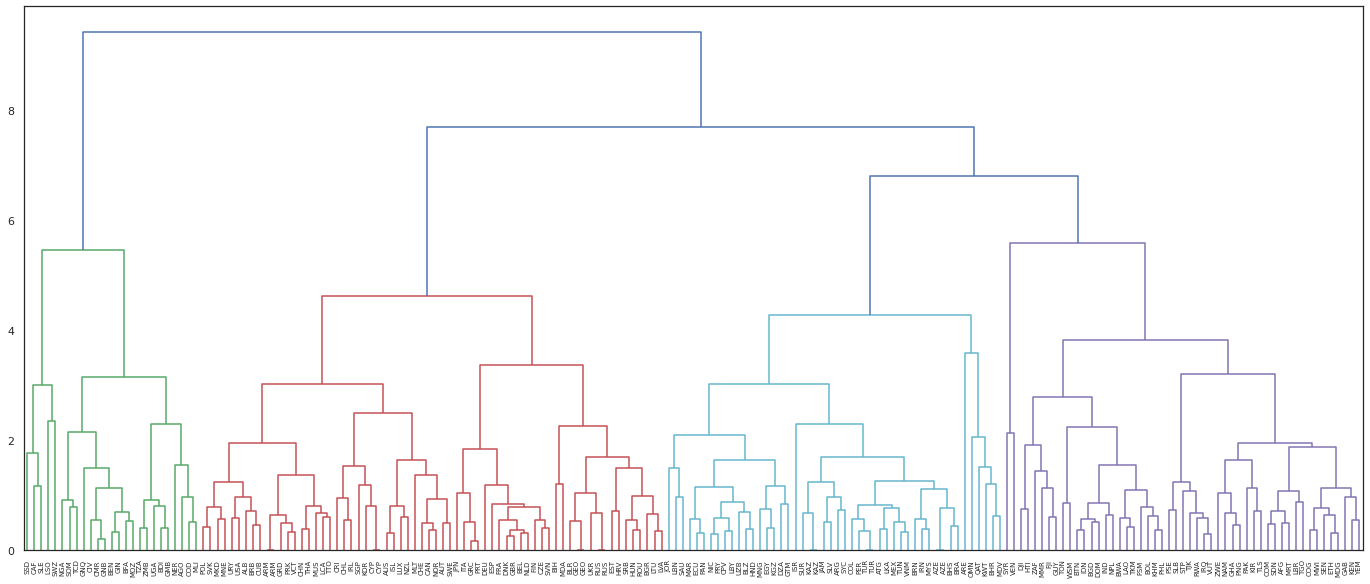

In [ ]:
distance_matrix = linkage(c[cnames_demo_scaled], method = 'complete', metric = 'euclidean')
dn = plt.figure( figsize = (24, 10) )
dn = dendrogram(distance_matrix, labels = list(c['Three_Letter_Country_Code']), leaf_font_size = 7)


In [ ]:
c['cluster_labels'] = fcluster(distance_matrix, 4, criterion = 'maxclust' ).astype(str)
fig = px.choropleth(data_frame = c,
                    locations= c.Three_Letter_Country_Code,
                    color= "cluster_labels",
                    width=1500, height=1000
)

fig.show()

In [ ]:
clusters = c[newnames_demo + ['cluster_labels']].groupby(['cluster_labels']).agg(['mean']).round(2)
clusters.style.background_gradient(cmap='RdYlGn')

,Infant_Mortality,Population_over65,Population_less14,LifeExpectancy,BirthRate,FertilityRate,PopulationGrowth,MortalityRate
,mean,mean,mean,mean,mean,mean,mean,mean
cluster_labels,,,,,,,,
1,61.130000,2.800000,44.100000,58.100000,37.900000,5.120000,2.670000,9.970000
2,5.980000,15.560000,17.040000,78.250000,11.210000,1.620000,0.360000,9.610000
3,12.880000,5.940000,26.130000,74.980000,18.860000,2.330000,1.720000,5.220000
4,34.260000,4.060000,35.970000,67.350000,27.420000,3.480000,1.720000,6.670000


Algorytm wykrył cztery klastry:
1. Są tu kraje o najniższej długości życia, dużym udziale osób młodych oraz bardzo dużej
śmiertelności niemowląt – tylko kraje Afryki
2. Kraje o wysokiej oczekiwanej długości życia, społeczeństwa stare, o bardzo niskim
tempie wzrostu populacji; kraje rozwinięte – cała Europa, USA, Kanada, Chiny,
Japonia, Australia, Nowa Zelandia, Urugwaj oraz Chile

Grupy 3 i 4 to kraje charakteryzujące się wartościami pomiędzy grupą pierwszą i drugą. Grupy wytworzone przez algorytm rzeczywiście prezentują obraz zgodny z teorią przejścia demograficznego.

Spróbujmy zmienić metodę wyznaczania odległości między klastrami na średnią odległość.

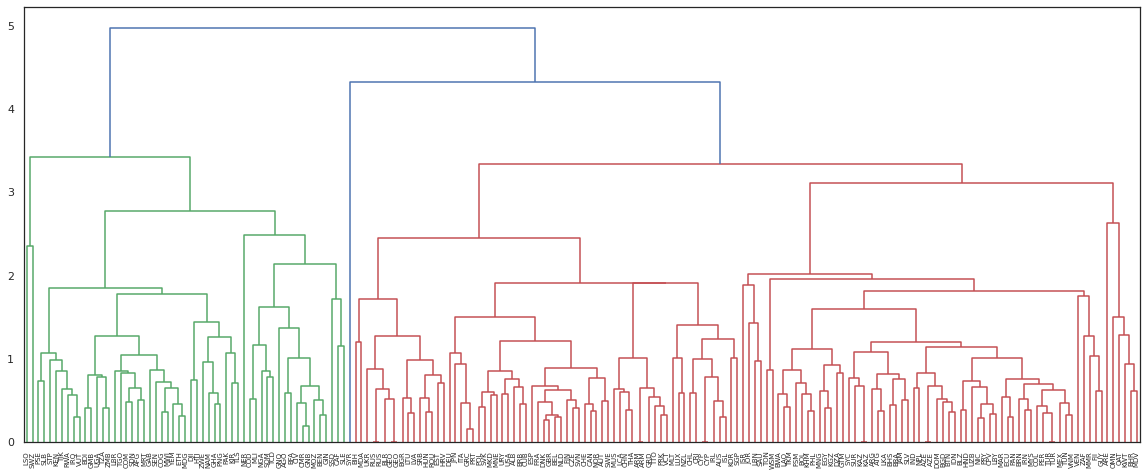

In [ ]:
distance_matrix = linkage(c[cnames_demo_scaled], method = 'average', metric = 'euclidean')
dn = dendrogram(distance_matrix, labels = list(c['Three_Letter_Country_Code']), leaf_font_size = 7)

In [ ]:
c['cluster_labels'] = fcluster(distance_matrix, 3, criterion = 'maxclust' )
fig = px.choropleth(data_frame = c,
                    locations= c.Three_Letter_Country_Code,
                    color= "cluster_labels",
                    width=1500, height=1000
)
fig.show()

In [ ]:
clusters = c[newnames_demo + ['cluster_labels']].groupby(['cluster_labels']).agg(['mean']).round(2)
clusters.style.background_gradient(cmap='RdYlGn')

,Infant_Mortality,Population_over65,Population_less14,LifeExpectancy,BirthRate,FertilityRate,PopulationGrowth,MortalityRate
,mean,mean,mean,mean,mean,mean,mean,mean
cluster_labels,,,,,,,,
1,49.420000,3.050000,41.610000,62.340000,34.390000,4.540000,2.490000,8.150000
2,11.590000,10.580000,22.350000,75.760000,15.490000,2.030000,0.950000,7.610000
3,18.000000,4.150000,32.360000,70.320000,24.520000,2.890000,-3.000000,5.730000


Analiza średnich wartości dla każdej grupy pokazuje, że grupa pierwsza to kraje o bardzo dużej śmiertelności niemowląt, dużym udziale młodzieży oraz dużej dzietności.

Druga grupa to kraje o starszych społeczeństwach z niższą dzietności.

Syria tworząc własną grupę sugerować może nietypowy na tle innych krajów; jak widać po tabeli wartości średnich powodem jest zmienna PopulationGrowth; trudna sytuacja wewnętrzna spowodowała spadek ogólnej populacji o 3% w tym roku powodem jest najpewniej emigracja. 

### Analiza danych panelowych dla Europy w latach 1985 - 2015 

Spróbujmy do analizy dodać wymiar czasu. Pobierzemy dane z 30 lat i to na nich przeprowadzimy analizę. Jako że dla wielu krajów na prztrzeni lat występuje dużo braków w danych, skupimy się jedynie na danych z krajów europejskich. W tym wypadku, celem nie będzie znalezienie faz rozwoju o których mówi teoria przejścia demograficznego, ale kolejne fazy które można obserwować lokalnie w Europie.

In [ ]:
ceurope = wb.data.DataFrame(collist_demo,countries.index, range(1985,2016))
ceurope = ceurope.rename(columns = cnames_demo).reset_index()
ceurope = ceurope.melt(id_vars = ['economy', 'series'], var_name = 'year').pivot(index = ['economy', 'year'], columns = 'series', values = 'value').reset_index()
ceurope = ceurope.merge(cntrs, left_on='economy', right_on= 'Three_Letter_Country_Code', how = 'inner')
ceurope = ceurope.loc[ceurope['Continent_Name'] == 'Europe']
ceurope = ceurope.drop(axis = 1, labels = ['Continent_Name',
'Continent_Code',
'Country_Name',
'Two_Letter_Country_Code',
'Three_Letter_Country_Code',
'Country_Number'])

ceurope = ceurope.rename(columns = cnames_demo)

In [ ]:
ceurope = ceurope.rename(columns = cnames_demo)
ceurope = ceurope.reset_index()
ceurope.head()

,index,economy,year,BirthRate,MortalityRate,Infant_Mortality,LifeExpectancy,FertilityRate,Population_less14,Population_over65,PopulationGrowth
0,93,ALB,YR1985,26.367,5.907,46.5,71.388,3.269,34.047161,5.394636,2.055995
1,94,ALB,YR1986,26.241,5.855,43.7,71.605,3.217,33.774323,5.407771,1.933221
2,95,ALB,YR1987,26.047,5.836,41.2,71.760,3.164,33.545138,5.411256,1.997040
3,96,ALB,YR1988,25.762,5.855,39.0,71.843,3.108,33.336822,5.416846,1.886711
4,97,ALB,YR1989,25.372,5.908,37.1,71.860,3.046,33.097662,5.441163,2.687862


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = pd.DataFrame(scaler.fit_transform(ceurope[newnames_demo]), columns= [newnames_demo])
ceurope[cnames_demo_scaled] = data_rescaled

,index,economy,year,BirthRate,MortalityRate,Infant_Mortality,LifeExpectancy,FertilityRate,Population_less14,Population_over65,PopulationGrowth,Infant_Mortality_scaled,Population_over65_scaled,Population_less14_scaled,LifeExpectancy_scaled,BirthRate_scaled,FertilityRate_scaled,PopulationGrowth_scaled,MortalityRate_scaled
1607,6443,UKR,YR2011,11.0,14.5,9.6,70.809268,1.459,14.359707,15.658151,-0.359600,0.099237,0.640869,0.046013,0.384548,0.149813,0.143072,0.424246,0.740506
1608,6444,UKR,YR2012,11.4,14.5,9.2,70.944146,1.531,14.558620,15.625301,-0.246976,0.094148,0.638994,0.054023,0.390230,0.167438,0.170109,0.437944,0.740506
1609,6445,UKR,YR2013,11.1,14.6,8.8,71.159512,1.506,14.756885,15.613109,-0.227691,0.089059,0.638298,0.062006,0.399304,0.154219,0.160721,0.440290,0.746835
1610,6446,UKR,YR2014,10.8,14.7,8.4,71.186585,1.498,14.992521,15.625796,-0.479262,0.083969,0.639022,0.071494,0.400445,0.141000,0.157717,0.409692,0.753165
1611,6447,UKR,YR2015,10.7,14.9,8.1,71.189512,1.506,15.263938,15.669413,-0.261250,0.080153,0.641512,0.082422,0.400568,0.136594,0.160721,0.436208,0.765823


In [ ]:
ceurope = ceurope.dropna()
ceurope.head()

,index,economy,year,BirthRate,MortalityRate,Infant_Mortality,LifeExpectancy,FertilityRate,Population_less14,Population_over65,PopulationGrowth,Infant_Mortality_scaled,Population_over65_scaled,Population_less14_scaled,LifeExpectancy_scaled,BirthRate_scaled,FertilityRate_scaled,PopulationGrowth_scaled,MortalityRate_scaled
0,93,ALB,YR1985,26.367,5.907,46.5,71.388000,3.269,34.047161,5.394636,2.055995,0.568702,0.054914,0.838727,0.408931,0.826922,0.822756,0.718049,0.196646
1,94,ALB,YR1986,26.241,5.855,43.7,71.605000,3.217,33.774323,5.407771,1.933221,0.533079,0.055664,0.827741,0.418073,0.821370,0.803229,0.703116,0.193354
2,95,ALB,YR1987,26.047,5.836,41.2,71.760000,3.164,33.545138,5.411256,1.997040,0.501272,0.055863,0.818513,0.424604,0.812822,0.783327,0.710878,0.192152
3,96,ALB,YR1988,25.762,5.855,39.0,71.843000,3.108,33.336822,5.416846,1.886711,0.473282,0.056182,0.810126,0.428101,0.800264,0.762298,0.697459,0.193354
4,97,ALB,YR1989,25.372,5.908,37.1,71.860000,3.046,33.097662,5.441163,2.687862,0.449109,0.057571,0.800496,0.428817,0.783080,0.739016,0.794901,0.196709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,6443,UKR,YR2011,11.000,14.500,9.6,70.809268,1.459,14.359707,15.658151,-0.359600,0.099237,0.640869,0.046013,0.384548,0.149813,0.143072,0.424246,0.740506
1608,6444,UKR,YR2012,11.400,14.500,9.2,70.944146,1.531,14.558620,15.625301,-0.246976,0.094148,0.638994,0.054023,0.390230,0.167438,0.170109,0.437944,0.740506
1609,6445,UKR,YR2013,11.100,14.600,8.8,71.159512,1.506,14.756885,15.613109,-0.227691,0.089059,0.638298,0.062006,0.399304,0.154219,0.160721,0.440290,0.746835
1610,6446,UKR,YR2014,10.800,14.700,8.4,71.186585,1.498,14.992521,15.625796,-0.479262,0.083969,0.639022,0.071494,0.400445,0.141000,0.157717,0.409692,0.753165


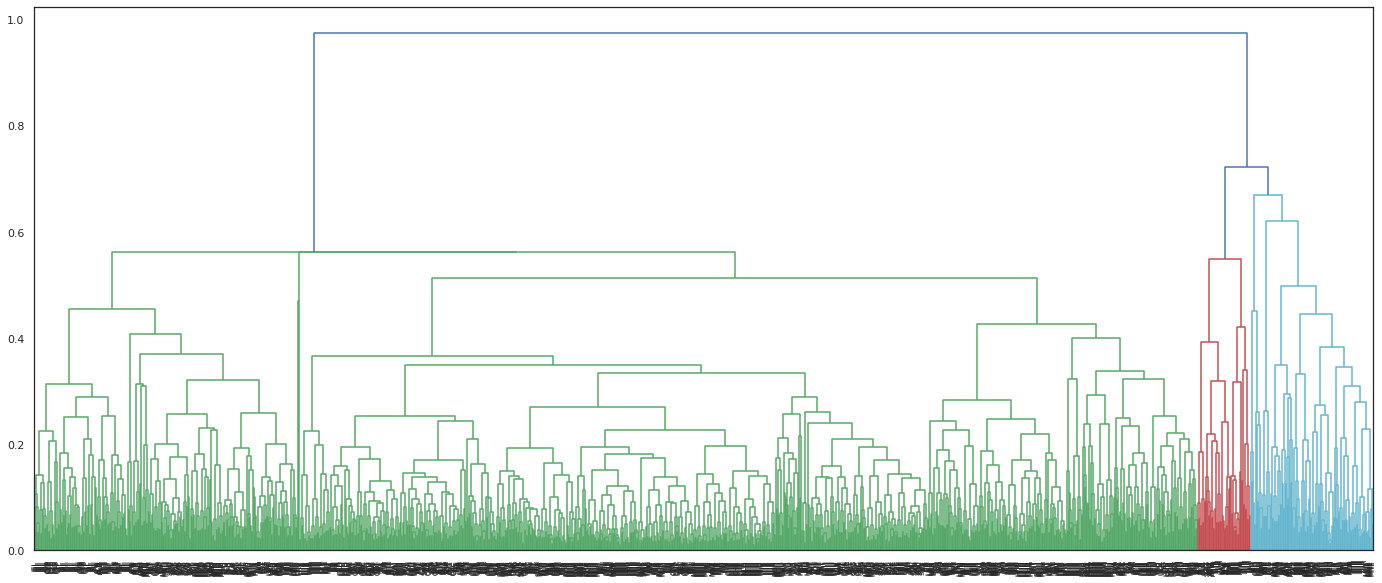

In [ ]:
distance_matrix = linkage(ceurope[cnames_demo_scaled], method = 'average', metric = 'euclidean')
dn = plt.figure( figsize = (24, 10) )
dn = dendrogram(distance_matrix, labels = list(ceurope['economy']), leaf_font_size = 7)

In [ ]:
ceurope['cluster_labels'] = fcluster(distance_matrix, 3, criterion = 'maxclust' )

In [ ]:
fig = px.choropleth(data_frame = ceurope,
                    locations= 'economy',
                    color= ceurope["cluster_labels"],
                    width=1500, height=1000,
                    animation_frame = 'year'
)
fig.show()

Wyniki nie prezentują dużej zmienności. Widzimy przejście do kolejnych grup jedynie na krajach byłej Jugosławii oraz w Mołdawii, Turcji i Kazachstanie. Sprawdźmy czy inne metody klasteryzacji pokażą więcej różnorodności na przestrzeni 30 lat.

Analiza współzmienności, która wcześniej przeprowadzona była na podstawie danych z roku 2016, pokazuje że dane wybrane do analizy są ze zobą mocno skorelowane. Przerzucenie całej zmienności przy pomocy analizy PCA do dwóch wymiarów, pozwoli nam zaobserwować sam proces przejścia na płaszczyźnie.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc_2components = pca.fit_transform(ceurope[cnames_demo_scaled])

principalDf = pd.DataFrame(data = pc_2components
             , columns = ['PC1', 'PC2' ])

print('Explained variance:', sum(pca.explained_variance_ratio_) )

Explained variance: 0.8658665265317572


In [ ]:
ceurope = pd.concat([ceurope.reset_index(), principalDf], axis = 1)
ceurope = ceurope.drop(['level_0', 'index'], axis = 1)
ceurope.head()

,economy,year,BirthRate,MortalityRate,Infant_Mortality,LifeExpectancy,FertilityRate,Population_less14,Population_over65,PopulationGrowth,Infant_Mortality_scaled,Population_over65_scaled,Population_less14_scaled,LifeExpectancy_scaled,BirthRate_scaled,FertilityRate_scaled,PopulationGrowth_scaled,MortalityRate_scaled,cluster_labels,PC1,PC2
0,ALB,YR1985,26.367,5.907,46.5,71.388,3.269,34.047161,5.394636,2.055995,0.568702,0.054914,0.838727,0.408931,0.826922,0.822756,0.718049,0.196646,2,1.186130,-0.319318
1,ALB,YR1986,26.241,5.855,43.7,71.605,3.217,33.774323,5.407771,1.933221,0.533079,0.055664,0.827741,0.418073,0.821370,0.803229,0.703116,0.193354,2,1.155950,-0.323078
2,ALB,YR1987,26.047,5.836,41.2,71.760,3.164,33.545138,5.411256,1.997040,0.501272,0.055863,0.818513,0.424604,0.812822,0.783327,0.710878,0.192152,2,1.128987,-0.330079
3,ALB,YR1988,25.762,5.855,39.0,71.843,3.108,33.336822,5.416846,1.886711,0.473282,0.056182,0.810126,0.428101,0.800264,0.762298,0.697459,0.193354,2,1.100978,-0.325184
4,ALB,YR1989,25.372,5.908,37.1,71.860,3.046,33.097662,5.441163,2.687862,0.449109,0.057571,0.800496,0.428817,0.783080,0.739016,0.794901,0.196709,2,1.078617,-0.351200


Przy "uproszczeniu" zbiorudanych do dwóch zmiennych zachowujemy ponad 86% zmienności, co jest całkiem niezłym wynikiem. Tracąc część zmienności, uzyskamy możliwość łatwiejszej analizy danych.

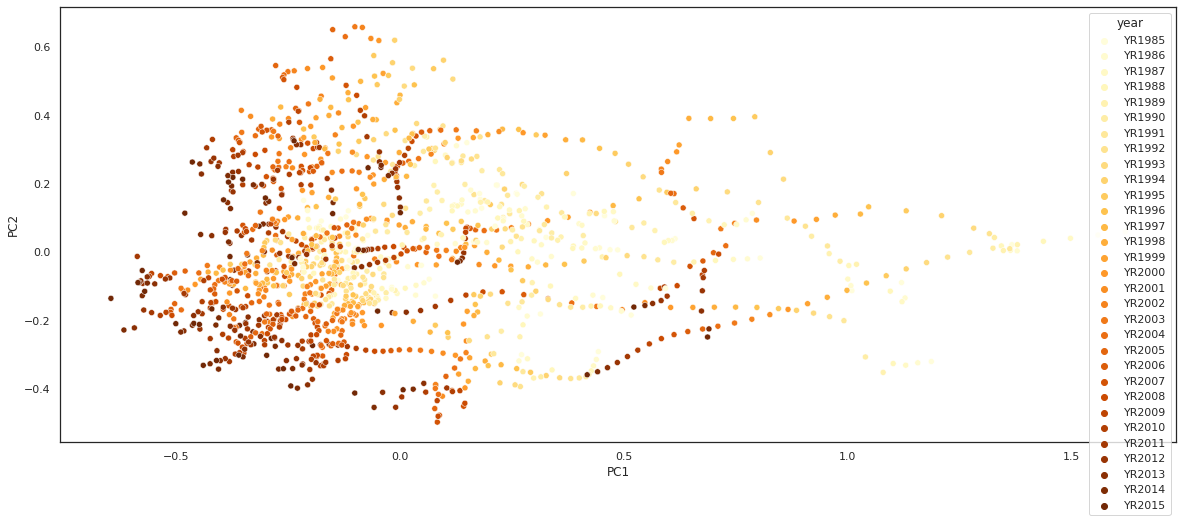

In [ ]:
sns.set_style("white")
sns.scatterplot(data = ceurope, x = 'PC1', y = 'PC2', hue = 'year', palette = 'YlOrBr')

Ciemniejsze punkty oznaczają kolejne lata. Widać, że kraje przesuwają się ku niższym wartościom PC1. W przypadku wartości PC2 wykres nie pokazuje jasno, ścieżki którą podążają populacje. Nanieśmy tą informację na wykres z wektorami, które wskazywać będą drogę, którą przeszły poszczególne populację między 1985 i 2015 rokiem.

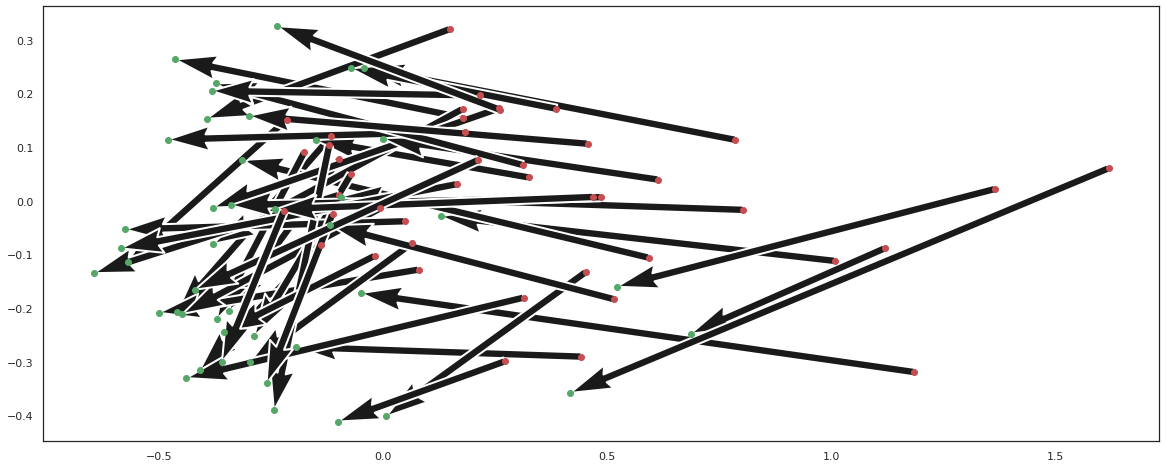

In [ ]:

g = ceurope[(ceurope['year'] == 'YR1985') | (ceurope['year'] ==  'YR2015')][['PC1', 'PC2', 'economy', 'year']]

g = pd.pivot_table(g, values=['PC1', 'PC2'], index='economy',
                    columns=['year'], aggfunc=np.sum)
g.columns = list(map("_".join, g.columns))
g = g.dropna()

fig, ax = plt.subplots()
ax.scatter(g['PC1_YR1985'], g['PC2_YR1985'], color='r', zorder=10)
ax.scatter(g['PC1_YR2015'], g['PC2_YR2015'], color='g', zorder=10)

arrow_start = np.array([g['PC1_YR1985'], g['PC2_YR1985']])
arrow_vector = np.array([g['PC1_YR2015']-g['PC1_YR1985'],g['PC2_YR2015']-g['PC2_YR1985'] ])

ax.quiver(arrow_start[0], arrow_start[1], arrow_vector[0], arrow_vector[1], angles='xy', scale_units='xy', scale=1, linewidths = 2)
plt.show()

Sprawdźmy, w których wymiarach poszczególne komponenty tłumaczą zmienność.

In [ ]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = ceurope[cnames_demo_scaled].columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2
variable,,
Infant_Mortality_scaled,0.357677,0.183658
Population_over65_scaled,-0.511907,-0.024036
Population_less14_scaled,0.477994,-0.076732
LifeExpectancy_scaled,-0.314481,-0.663448
BirthRate_scaled,0.386606,-0.180502
FertilityRate_scaled,0.322676,-0.208604
PopulationGrowth_scaled,0.066776,-0.325473
MortalityRate_scaled,-0.156839,0.581044


Powyższe wyniki wskazują na ile poszczególne zmienne krztałtowały poszczególne komponenty. Upraszczając, można uznać że na pierwszy komponent składają się zmienne dotyczące struktury społeczeństwa, a na drugi śmiertelność, długość życia oraz dynamika wzrostu populacji. Prawdopodobnie to emigracja stanowi w wykresach powyżej o różnych kierunkach ruchów na analizowanej płaszczyźnie.

Zielone kropki to pozycja państw na przestrzeni PC1 X PC2 w 2015, a czerwone w 1985 roku.

Po uproszczeniu danych do wektorów, widać że wszystkie populacje przemieszczają się ku niższym wartościom PC1. W przypadku wartości PC2 sytuacja jest trochę bardziej skomplikowana. Część krajów znacznie spadła w wartości, podczas gdy inne nie zmieniają się w wartości PC2, a niektóre nawet rosną. Można wyciągnąć wnioski że w Europie przez analizowane 30 lat, nie tylko mamy doczynienia z przejściem demograficznym, ale także wzrostem różnic wynikających z rozwoju 

In [ ]:
print("Największy wzrost PC2: ",g[g['PC2_YR2015']-g['PC2_YR1985'] > 0.1].index.values)
print("Największy spadek PC2: ",g[g['PC2_YR2015']-g['PC2_YR1985'] < -0.3].index.values)

Największy wzrost PC2:  ['ALB' 'BGR' 'BIH' 'LTU' 'MDA' 'MNE' 'UKR']
Największy spadek PC2:  ['AUT' 'DNK' 'GBR' 'LUX' 'NOR' 'TUR']


Jak widać można zauważyć dwie tendecje wśród krajów Europy. Spróbujmy zaklasyfikować teraz te kraje do poszczególnych grup, którym przypisać będziemy mogli kolejne fazy w rozwoju demograficznym. Na początku wykorzystamy algorytm k-średnich.

[Text(0, 0.5, 'Distortions'), Text(0.5, 0, 'Number of clusters')]

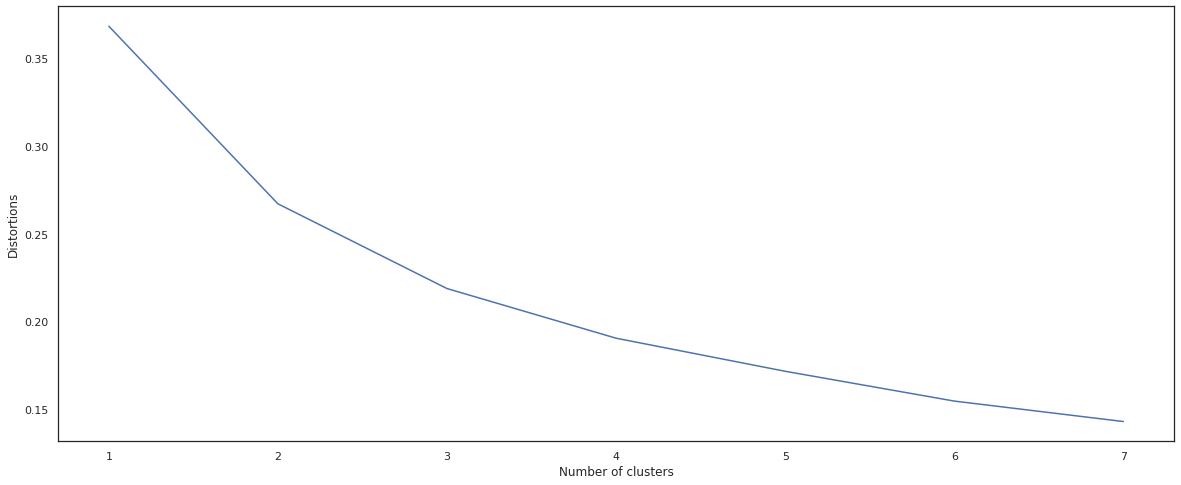

In [ ]:
from scipy.cluster.vq import kmeans, vq

distortions = []
num_clusters = range(1,8)

for i in num_clusters:
    cluster_centers, distortion = kmeans(ceurope[['PC1', 'PC2']], i)
    distortions.append(distortion)

elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

ax = sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
ax.set(xlabel='Number of clusters', ylabel='Distortions')

Przy wykorzytsaniu algorytmu k-means, sami musimy wskazać ilość klastrów na którą podzielimy próbę. W wyborze tej liczby pomocny jest tzw. elbow plot.

W analizie wykresu szukamy punktu największego załamania. Punkt ten wyznacza ilość klastrów, którym dodanie kolejnego klastru nie spowoduje znacznego spadku miary "zniekształcenia", czyli sumy odległości punktów od centrów.

Na wykresie powyżej nie widać znacznego punktu przegięcia - może to być zarówno 2 lub 3 klastry. Spróbujmy podzielić próbę na trzy grupy.

In [ ]:
cluster_centers, distortion = kmeans(ceurope[['PC1', 'PC2']],3)
ceurope['cluster_labels'], distortion_list = vq(ceurope[['PC1', 'PC2']], cluster_centers)

In [ ]:
fig = px.choropleth(data_frame = ceurope,
                    locations= 'economy',
                    color= ceurope["cluster_labels"],
                    width=1500, height=1000,
                    animation_frame = 'year'
)
fig.show()

In [ ]:
clusters = ceurope[newnames_demo + ['cluster_labels']].groupby(['cluster_labels']).agg(['mean']).round(2)
clusters.style.background_gradient(cmap='RdYlGn')

,Infant_Mortality,Population_over65,Population_less14,LifeExpectancy,BirthRate,FertilityRate,PopulationGrowth,MortalityRate
,mean,mean,mean,mean,mean,mean,mean,mean
cluster_labels,,,,,,,,
0,5.030000,15.280000,17.560000,78.260000,11.340000,1.590000,0.500000,9.330000
1,28.870000,7.890000,27.290000,70.660000,18.310000,2.270000,0.620000,8.120000
2,12.030000,13.530000,18.630000,71.310000,11.110000,1.530000,-0.430000,12.510000


Przez okres 30 lat widać kilka interesujących faktów:
1. rozwinięte kraje zachodu oraz Skandynawia już od 1985 roku znajduje się w najbardziej rozwiniętym klastrze
2. Polska od 1985 roku stopniowo przechodziła do przez kolejne grupy, żeby ostatecznie znaleźć się w grupie najbardziej rozwiniętych krajó; Ukraina która w 1985 znajdowała się w grupie razem z Czechami i Wielką Brytanią, ostatecznie została w tej samej grupie
3. ostateczny prawie idealnie wskazuje granicę Unii Europejskiej (jako najbardziej rozwiniętą grupę)

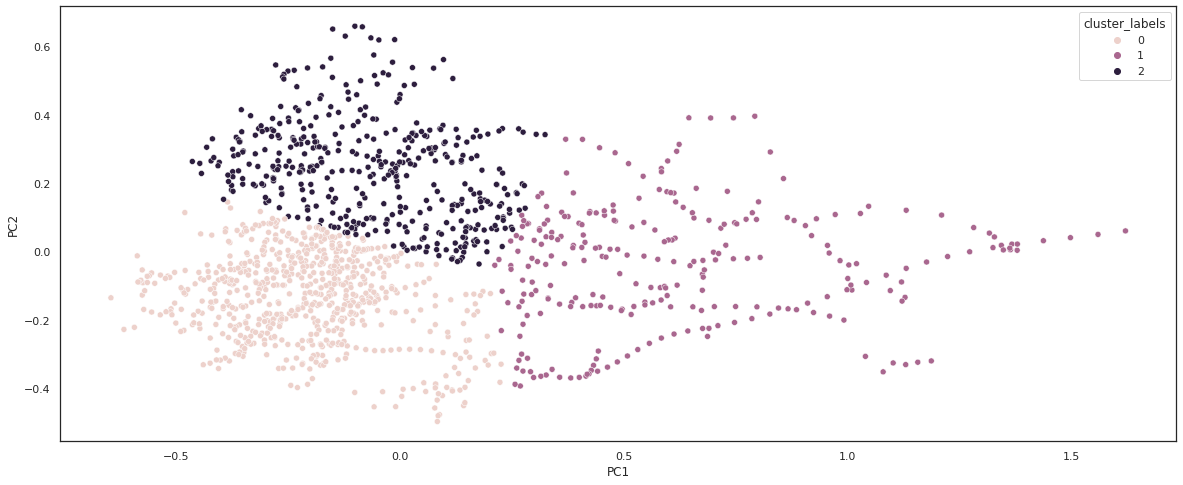

In [ ]:
sns.set_style("white")
sns.scatterplot(data = ceurope, x = 'PC1', y = 'PC2', hue = 'cluster_labels')

Wykres powyżej pokazuje, że trzy ostateczne klastry nie stanowią koniecznie kolejny faz przejścia. Są kraje, jak Albania, które z grupy "wczesnej" (niska długość życia, wysoki udział młodzieży) przechodzi do grupy najwyższego rozwoju (społeczeństwa starego). Sprawdźmy, czy inna metoda, czyli klastrowanie metodą mikstur gausowskich, nie przyniesie innych rezultatów.

In [ ]:
from sklearn.mixture import GaussianMixture
ceurope['cluster_labels_GMM'] = GaussianMixture(n_components=3, random_state=0).fit_predict(ceurope[ ['PC1', 'PC2'] ])

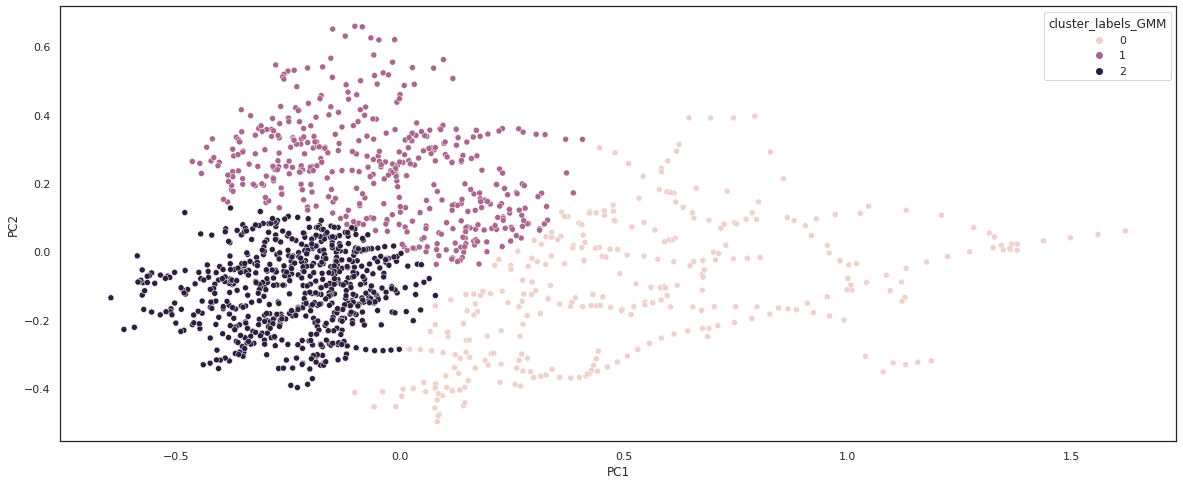

In [ ]:
sns.scatterplot(data = ceurope, x = 'PC1', y = 'PC2', hue = 'cluster_labels_GMM')

Jak widać, ostatecznie grupy nie różnią się znacznie z tymi wyznaczonymi przez algorytm k-średnich.

In [ ]:
fig = px.choropleth(data_frame = ceurope,
                    locations= 'economy',
                    color= "cluster_labels_GMM",
                    width=1500, height=800,
                    animation_frame = 'year'
)
fig.show()

Dobór liczby klastrów w GMM poprzez minimalizoanie AIC/BIC.

Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

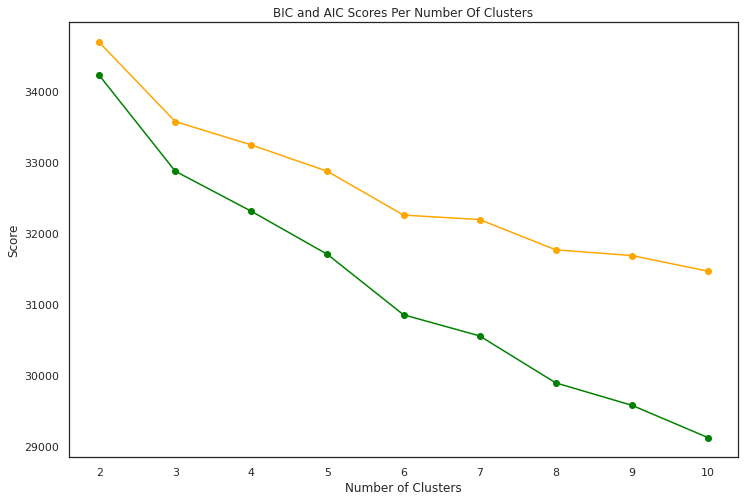

In [ ]:
n_range = range(2,11)

bic_score = []
aic_score = []
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(data_GMM[vars])
    
    bic_score.append(gm.bic(data_GMM[vars]))
    aic_score.append(gm.aic(data_GMM[vars]))

fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')